In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/train.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white


In [3]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 682.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6714.0,7.251638,1.330423,3.8000,6.4000,7.0000,7.7000,15.900
volatile acidity,6714.0,0.348436,0.168505,0.1000,0.2000,0.3000,0.4000,1.300
citric acid,6714.0,0.317466,0.148842,0.0000,0.2400,0.3100,0.3900,1.660
residual sugar,6714.0,5.411871,4.739180,0.6000,1.8000,3.0000,8.0000,65.800
chlorides,6714.0,0.057506,0.038175,0.0090,0.0380,0.0480,0.0680,0.611
free sulfur dioxide,6714.0,30.132559,17.619884,1.0000,16.0000,28.0000,41.0000,289.000
total sulfur dioxide,6714.0,114.576259,56.417138,6.0000,75.0000,117.0000,155.0000,440.000
density,6714.0,0.994789,0.003020,0.9871,0.9924,0.9951,0.9971,1.039
pH,6714.0,3.219103,0.160737,2.7200,3.1100,3.2100,3.3200,4.010
sulphates,6714.0,0.536120,0.157877,0.2200,0.4300,0.5100,0.6000,2.000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

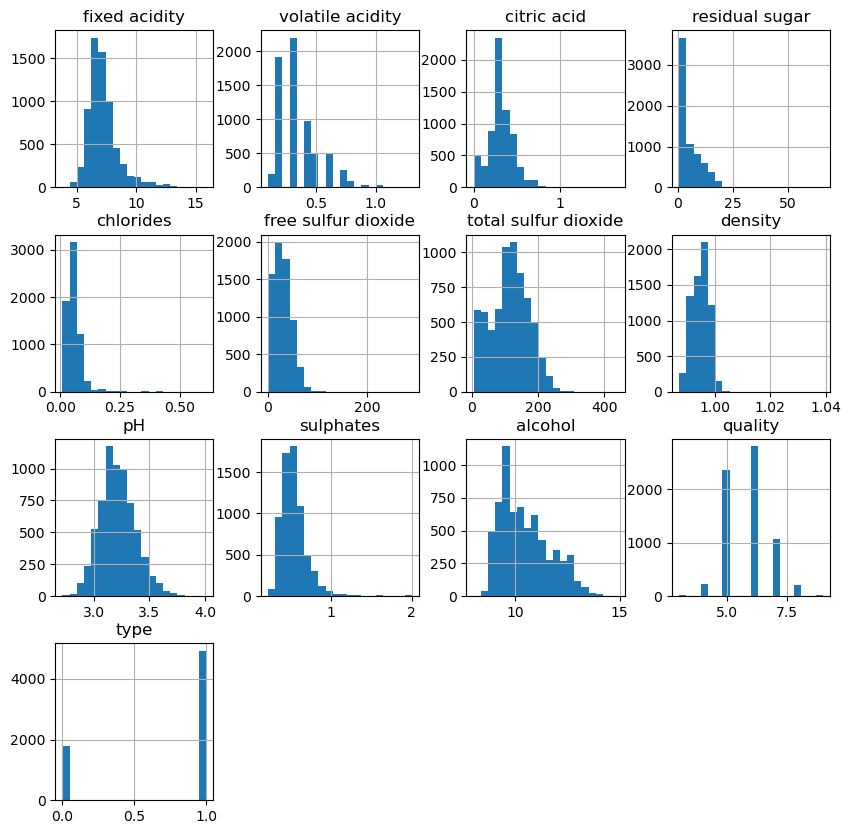

In [7]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

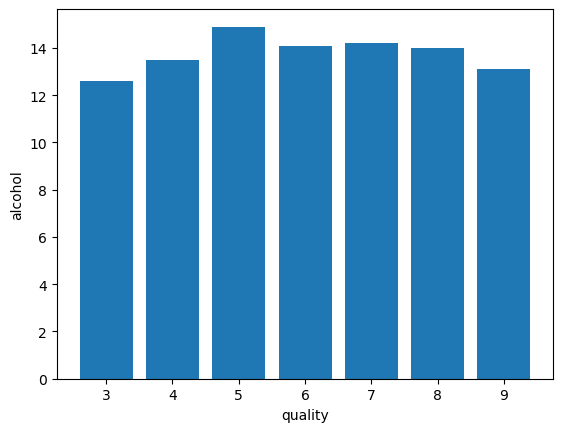

In [8]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

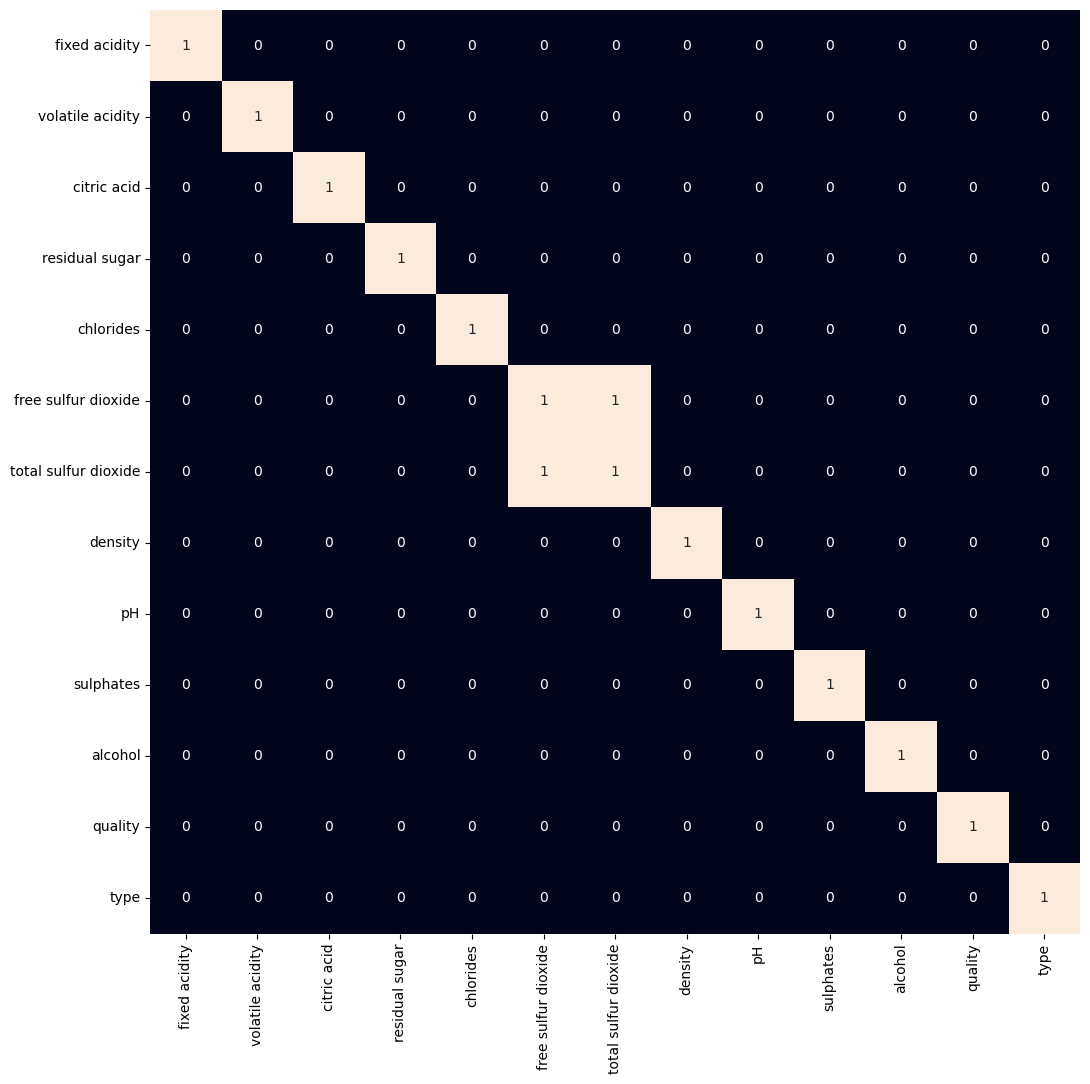

In [9]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [10]:
df = df.drop('total sulfur dioxide', axis=1)

In [11]:
X_train = df.drop(columns= ['quality'])
y_train = df['quality']

In [12]:
df1 = pd.read_csv('data/test.csv', sep=';')
df1.replace({'white': 1, 'red': 0}, inplace=True)
df1 = df1.drop('total sulfur dioxide', axis=1)

In [13]:
xtest = df1.drop('id', axis=1)

In [14]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(X_train)
xtest = norm.transform(xtest)

In [15]:
model = LogisticRegression()

In [16]:
model.fit(xtrain,y_train)

LogisticRegression()

In [18]:
y_predict = model.predict(xtest)
y_predict

array([7, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6,
       6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5,
       6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 7, 6, 6, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5, 7,
       5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 7, 6, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5,
       5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5,